## K-Means

In [11]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [12]:
iris = load_iris()
X = iris.data
estimator = KMeans(n_clusters=3)
estimator.fit(X)
label_pred = estimator.labels_
print(label_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## DBSCAN

In [13]:
from sklearn import datasets
import numpy as np
import random
import matplotlib.pyplot as plt


In [14]:

def findNeighbor(j, X, eps):
    N = []
    for p in range(X.shape[0]):
        distance = np.linalg.norm(X[j] - X[p])
        if distance < eps:
            N.append(p)
    return N

def dbscan(X, eps, minPts):
    k = -1
    cluster = [-1 for _ in range(len(X))]
    fill = []
    gamma = [x for x in range(len(X))]
    
    while len(gamma) > 0:
        j = random.choice(gamma)
        gamma.remove(j)
        fill.append(j)
        NeighborPts = findNeighbor(j, X, eps)
        
        if len(NeighborPts) < minPts:
            cluster[j] = -1
        else:
            k += 1
            cluster[j] = k
            for i in NeighborPts:
                if i not in fill:
                    gamma.remove(i)
                    fill.append(i)
                    Ner_NeighborPts = findNeighbor(i, X, eps)
                    if len(Ner_NeighborPts) >= minPts:
                        for n in Ner_NeighborPts:
                            if n not in NeighborPts:
                                NeighborPts.append(n)
                    if cluster[i] == -1:
                        cluster[i] = k
    return cluster


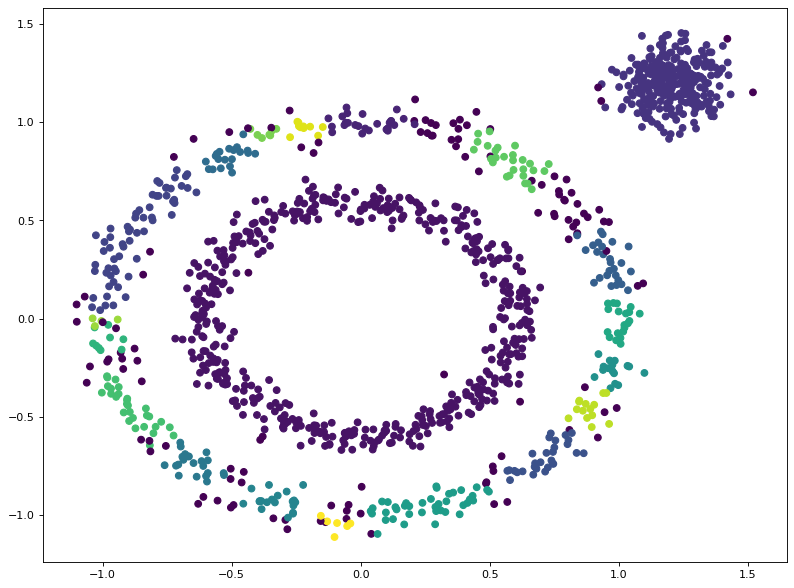

In [15]:

# 生成数据
X1, y1 = datasets.make_circles(n_samples=1000, factor=0.6, noise=0.05)
X2, y2 = datasets.make_blobs(n_samples=300, n_features=2, centers=[[1.2, 1.2]], cluster_std=[[0.1]], random_state=9)
X = np.concatenate((X1, X2))

# 设置参数
eps = 0.08
minPts = 10

# 运行DBSCAN算法
C = dbscan(X, eps, minPts)

# 绘制结果
plt.figure(figsize=(12, 9), dpi=80)
plt.scatter(X[:, 0], X[:, 1], c=C)
plt.show()